In [ ]:
## Name: Frenel Cherubin
## Date: 5/3/2020
## Course DSC 550
## Assignment: Exercise 8.3

In [1]:
# Load the required libraries and the data.
import pandas as pd
import yellowbrick


# Step 1:  Load data into a dataframe
data = pd.read_csv('airline-safety2.csv')

In [2]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (30, 12)


In [3]:
#Step 3:  Look at the data
print(data.head(5))

                 airline  survive     sex   age  avail_seat_km_per_week  \
0             Aer Lingus        0  female  37.0               320906734   
1              Aeroflot*        1    male  72.0              1197672318   
2  Aerolineas Argentinas        1    male  71.0               385803648   
3            Aeromexico*        0    male  70.0               596871813   
4             Air Canada        1  female  26.0              1865253802   

   incidents_85_99  fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                2                      0                 0                0   
1               76                     14               128                6   
2                6                      0                 0                1   
3                3                      1                64                5   
4                2                      0                 0                2   

   fatal_accidents_00_14  Unnamed: 10 boarded  
0                   

In [ ]:
# Step 4: Think about some questions that might help you predict who will survive:
# a. What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what
# are their distribution; if they are categorical, how many are they in different categories?
# The data comtains 3 categorical and 9 numerical variables.

# b. Are the numerical variables correlated? Yes, there is some sort of correlation between them.

# c.Are the distributions of numerical variables the same or different among survived and not survived? Is the survival
# rate different for different values? For example, were people more likely to survive if they were younger?
# The distribution of numerical variables is different among those that survived as oppose to those that did not, and
# the survival rate is different for different values. More women survived than men.

# d. Are there different survival rates in different categories? For example, did more women survived than man?
# Yes, there are different survival rates in different categories. It is evident that more women survived than men,
# and most of the passengers are between the age of 27 and 30.

In [4]:
# Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
         survive        age  avail_seat_km_per_week  incidents_85_99  \
count  30.000000  28.000000            3.000000e+01        30.000000   
mean    0.533333  38.392857            1.294308e+09         8.333333   
std     0.507416  16.587231            1.486073e+09        14.473122   
min     0.000000  18.000000            2.774148e+08         0.000000   
25%     0.000000  25.750000            4.356271e+08         2.000000   
50%     1.000000  34.000000            6.556846e+08         3.000000   
75%     1.000000  47.250000            1.480081e+09         7.750000   
max     1.000000  72.000000            6.525659e+09        76.000000   

       fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
count               30.00000         30.000000        30.000000   
mean                 2.30000        114.566667         3.900000   
std                  3.45563        162.734750         5.094622   
min                  0.00000          0.000000         0.000000   
25

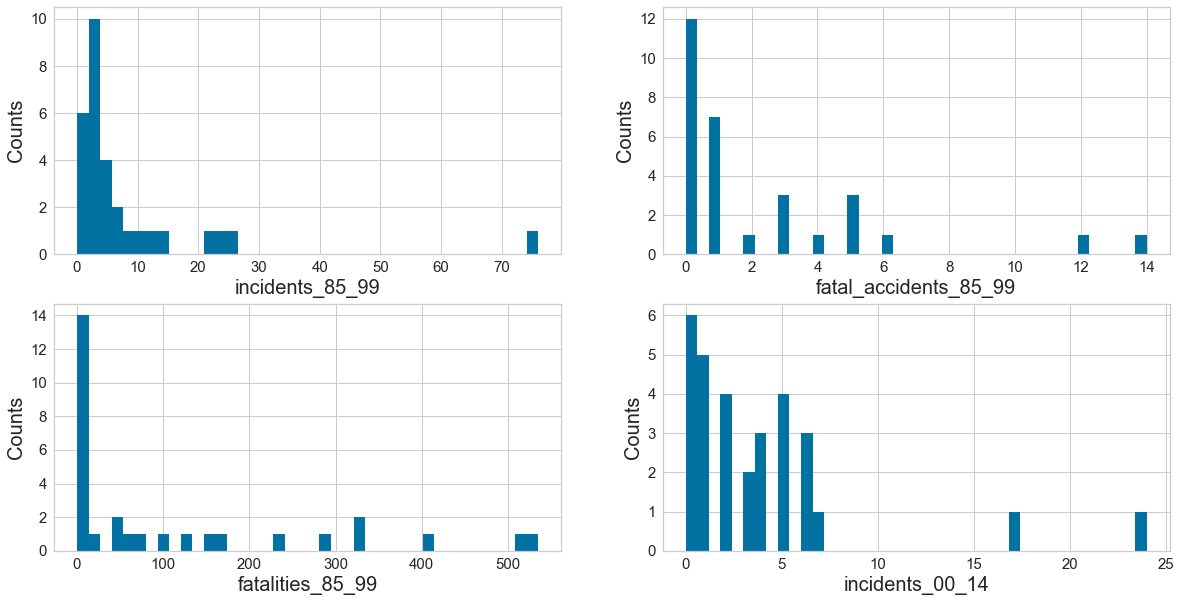

In [5]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()

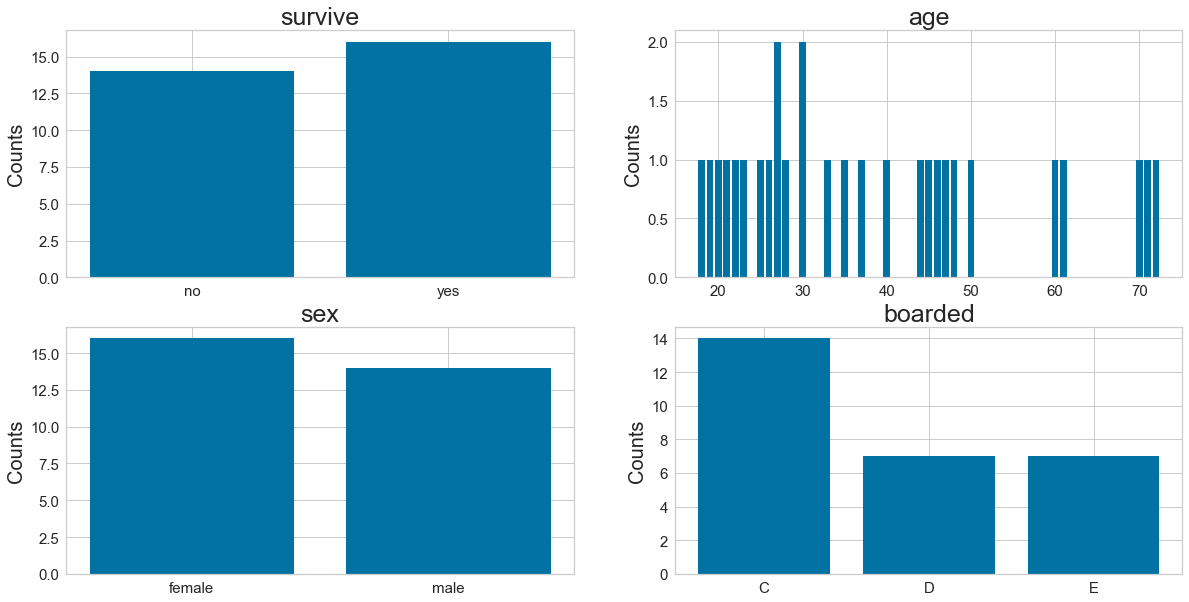

In [6]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_survive = data.replace({'survive': {1: 'yes', 0: 'no'}}).groupby('survive').size().reset_index(name='Counts')['survive']
Y_survive = data.replace({'survive': {1: 'yes', 0: 'no'}}).groupby('survive').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_survive, Y_survive)
axes[0, 0].set_title('survive', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_age= data.replace({'age': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('age').size().reset_index(name='Counts')['age']
Y_age= data.replace({'age': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('age').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_age, Y_age)
axes[0, 1].set_title('age', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_sex = data.groupby('sex').size().reset_index(name='Counts')['sex']
Y_sex = data.groupby('sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_sex, Y_sex)
axes[1, 0].set_title('sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_boarded = data.groupby('boarded').size().reset_index(name='Counts')['boarded']
Y_boarded = data.groupby('boarded').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_boarded, Y_boarded)
axes[1, 1].set_title('boarded', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()


C:\Users\cherf001\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


array([[  2,   0,   0,   0],
       [ 76,  14, 128,   6],
       [  6,   0,   0,   1],
       [  3,   1,  64,   5],
       [  2,   0,   0,   2],
       [ 14,   4,  79,   6],
       [  2,   1, 329,   4],
       [  3,   0,   0,   5],
       [  5,   0,   0,   5],
       [  7,   2,  50,   4],
       [  3,   1,   1,   7],
       [ 21,   5, 101,  17],
       [  1,   0,   0,   1],
       [  5,   3, 323,   0],
       [  4,   0,   0,   6],
       [  0,   0,   0,   2],
       [ 12,   6, 535,   2],
       [  2,   1,  16,   0],
       [  3,   1,  47,   0],
       [ 24,  12, 407,  24],
       [  8,   3, 282,   4],
       [  1,   5,   4,   1],
       [ 25,   5, 167,   5],
       [  1,   0,   0,   0],
       [ 10,   3, 236,   2],
       [  1,   0,   0,   1],
       [  0,   0,   0,   1],
       [  4,   1, 148,   0],
       [  3,   1, 520,   3],
       [  2,   0,   0,   3]], dtype=int64)

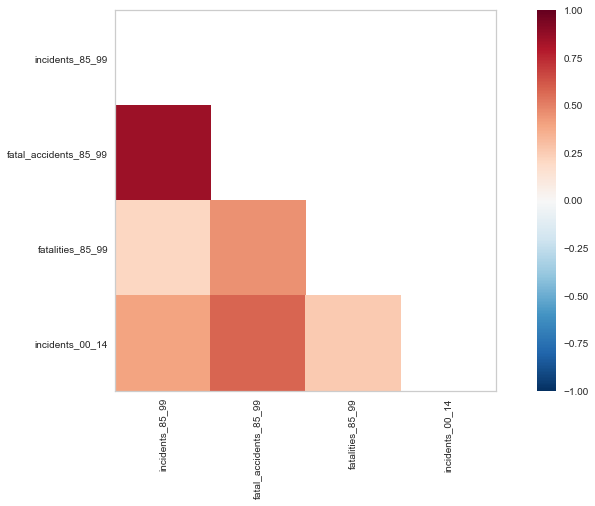

In [7]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
#plt.show()

C:\Users\cherf001\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\cherf001\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


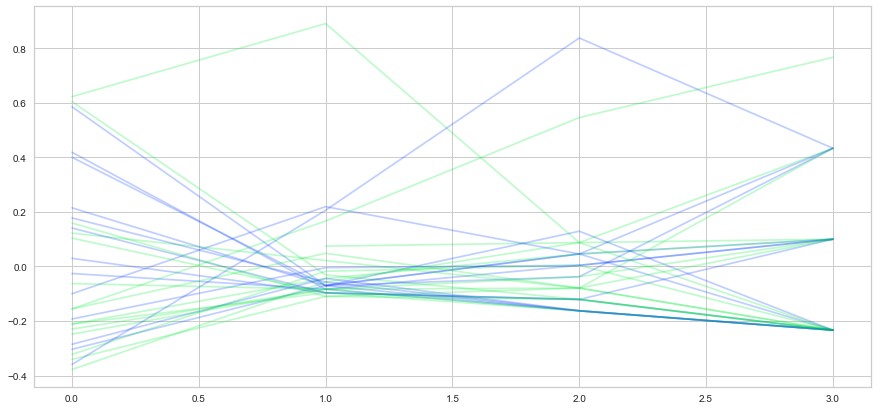

In [8]:
# Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survive', 'survive']
num_features = ['age', 'incidents_85_99', 'incidents_00_14', 'fatal_accidents_00_14']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.survive.as_matrix()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
plt.show();

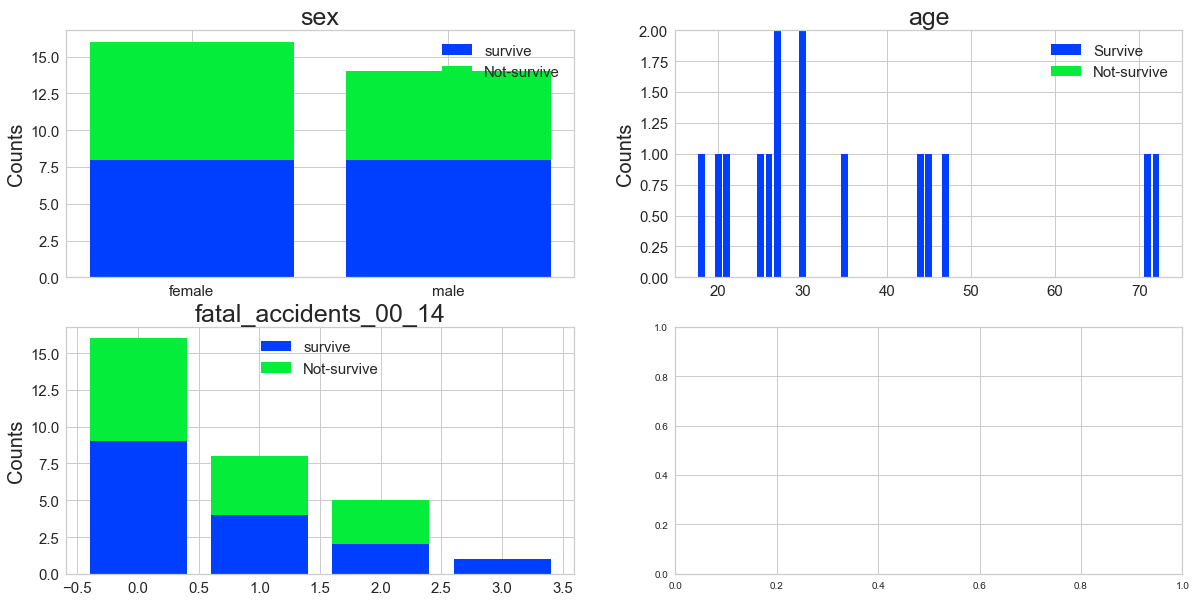

In [9]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
sex_survive = data.replace({'survive': {1: 'survive', 0: 'Not-survive'}})[data['survive']==1]['sex'].value_counts()
sex_not_survive = data.replace({'survive': {1: 'survive', 0: 'Not-survive'}})[data['survive']==0]['sex'].value_counts()
sex_not_survive = sex_not_survive.reindex(index = sex_survive.index)
# make the bar plot
p1 = axes[0, 0].bar(sex_survive.index, sex_survive.values)
p2 = axes[0, 0].bar(sex_not_survive.index, sex_not_survive.values, bottom=sex_survive.values)
axes[0, 0].set_title('sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('survive', 'Not-survive'), fontsize = 15)

# make the data read to feed into the visualizer
age_survive = data.replace({'survive': {1: 'survive', 0: 'Not-survive'}}).replace({'age': {1: '1st', 2: '2nd', 3: '3rd'}})[data['survive']==1]['age'].value_counts()
age_not_survive = data.replace({'survive': {1: 'survive', 0: 'Not-survive'}}).replace({'age': {1: '1st', 2: '2nd', 3: '3rd'}})[data['survive']==0]['age'].value_counts()
age_not_survive = age_not_survive.reindex(index = age_survive.index)
# make the bar plot
p3 = axes[0, 1].bar(age_survive.index, age_survive.values)
p4 = axes[0, 1].bar(age_not_survive.index, age_not_survive.values, bottom=age_survive.values)
axes[0, 1].set_title('age', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survive', 'Not-survive'), fontsize = 15)
# make the data read to feed into the visualizer
fatal_accidents_00_14_survive = data.replace({'survive': {1: 'survive', 0: 'Not-survive'}})[data['survive']==1]['fatal_accidents_00_14'].value_counts()
fatal_accidents_00_14_not_survive = data.replace({'survive': {1: 'survive', 0: 'Not-survive'}})[data['survive']==0]['fatal_accidents_00_14'].value_counts()
fatal_accidents_00_14_not_survive = fatal_accidents_00_14_not_survive.reindex(index = fatal_accidents_00_14_survive.index)
# make the bar plot
p5 = axes[1, 0].bar(fatal_accidents_00_14_survive.index, fatal_accidents_00_14_survive.values)
p6 = axes[1, 0].bar(fatal_accidents_00_14_not_survive.index, fatal_accidents_00_14_not_survive.values, bottom=fatal_accidents_00_14_survive.values)
axes[1, 0].set_title('fatal_accidents_00_14', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('survive', 'Not-survive'), fontsize = 15)
#plt.show()


In [10]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['age'])

# check the result
print(data['age'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['boarded'])

# check the result
print(data['boarded'].describe())

# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)


# check the data
#print(data.describe())


count    30.000000
mean     38.100000
std      16.043798
min      18.000000
25%      26.250000
50%      34.000000
75%      46.750000
max      72.000000
Name: age, dtype: float64
count     30
unique     4
top        C
freq      14
Name: boarded, dtype: object


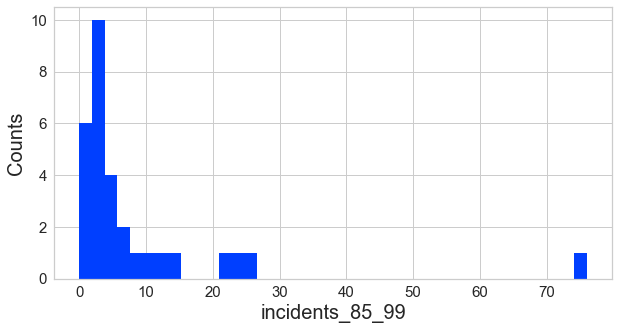

In [11]:
#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['incidents_85_99'], bins=40)
plt.xlabel('incidents_85_99', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [12]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['airline', 'sex', "boarded"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'airline': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))


   airline_Aer Lingus  airline_Aeroflot*  airline_Aerolineas Argentinas  \
0                   1                  0                              0   
1                   0                  1                              0   
2                   0                  0                              1   
3                   0                  0                              0   
4                   0                  0                              0   
5                   0                  0                              0   
6                   0                  0                              0   
7                   0                  0                              0   

   airline_Aeromexico*  airline_Air Canada  airline_Air France  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    1                   0                  

In [ ]:
# Review and provide feedback to one of your classmate’s Case Study Part 2 assignments which are posted to the Week 8 
#Discussion Forum. Also review the feedback you receive on your Part 2 assignment. Make any changes you think necessary

# Create Part 3 of your Analysis Case Study project. Part 3 should consist of Model Evaluation and Selection. You can 
# any methods/tools you think are most appropriate.

# Write the step-by-step instructions for completing the Model Evaluation and Selection part of your case study.

# You will post the entire Case Study (including the data) to the Week 9 Discussion Forum. This is due by the end of
# Week 8. This is a cumulative project so it is imperative that you do not fall behind.

# Submit the completed Case Study Part 3 to the Submission Link. Do not post the Sample Code to the Discussion Forum.

In [15]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'survive': {1: 'survive', 0: 'Not_survive'}})['survive']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  21
No. of samples in validation set: 9


No. of survived and not-survived in the training set:
Not_survive    12
survive         9
Name: survive, dtype: int64


No. of survived and not-survived in the validation set:
survive        7
Not_survive    2
Name: survive, dtype: int64


C:\Users\cherf001\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


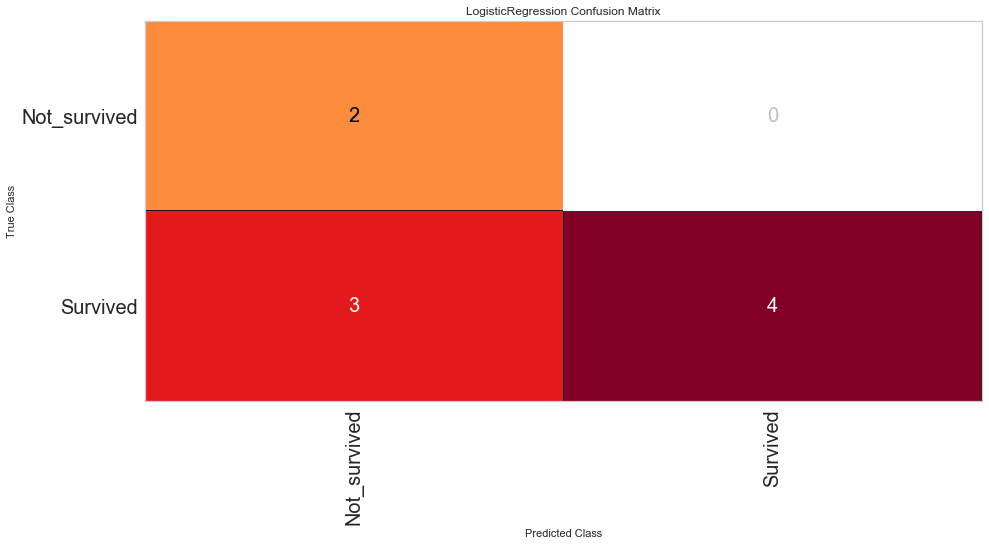

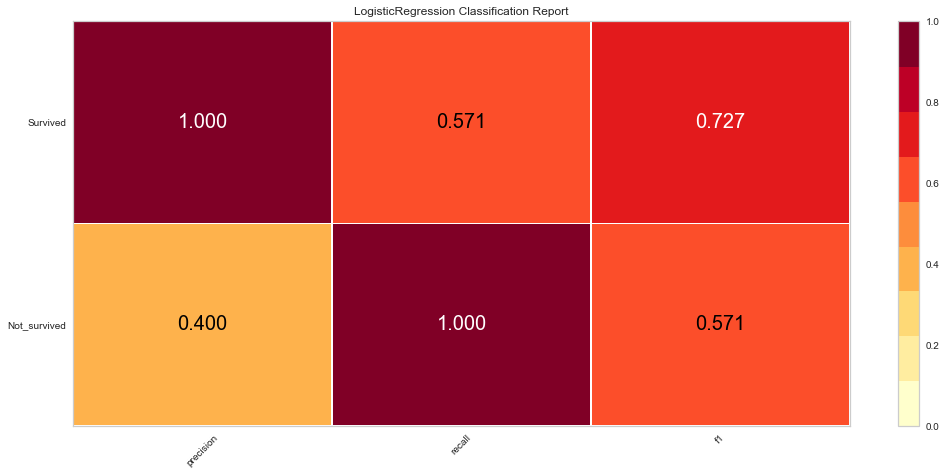

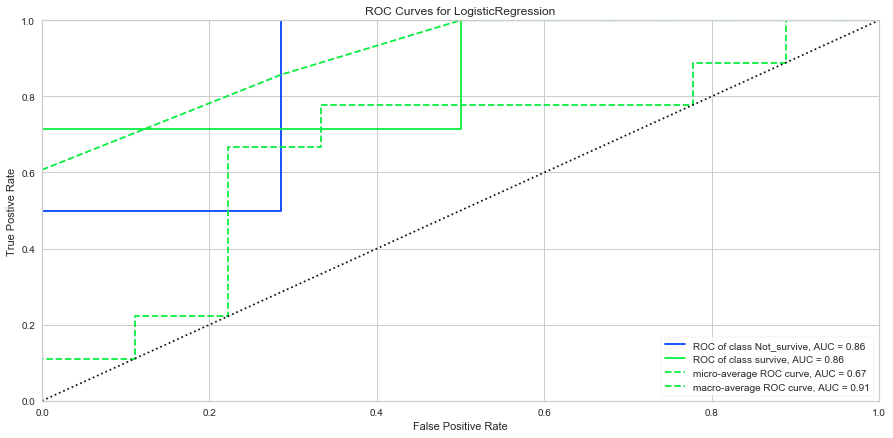

In [17]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()